In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [45]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
sp = pd.read_excel('./data/US Superstore data.xls')
sp.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [47]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [48]:
sp.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [49]:
sp.describe(include=np.object)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [50]:
print("총 데이터 수: ", sp.shape[0]*sp.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(sp.isnull().sum().sum(), (sp.isnull().sum().sum()) / (sp.shape[0] * sp.shape[1])))
print("데이터 기간: {} ~ {} ".format(min(sp['Order Date']), max(sp['Order Date'])))
print("전체 판매 물건 수: ", sp['Product ID'].nunique())

총 데이터 수:  209874
총 결측치 수: 0 = 전체 데이터의 0.00%
데이터 기간: 2014-01-03 00:00:00 ~ 2017-12-30 00:00:00 
전체 판매 물건 수:  1862


In [51]:
""" 어떤 종류의 물건이 팔렸는지
어느 도시에서 주문량이 많았는지
세그먼트와 지역에 따른 주문량과 판매금액
할인률이 높을수록 마진은 낮을지
어떤 종류의 상품이 매출이 높은지
어떤 주가 판매량이 높은지 """

' 어떤 종류의 물건이 팔렸는지\n어느 도시에서 주문량이 많았는지\n세그먼트와 지역에 따른 주문량과 판매금액\n할인률이 높을수록 마진은 낮을지\n어떤 종류의 상품이 매출이 높은지\n어떤 주가 판매량이 높은지 '

In [52]:
sp.duplicated().sum()

0

In [53]:
sp.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [54]:
sp.columns = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'cust_id', 'cust_name', 'seg', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'sales', 'quantity', 'discount', 'profit']

In [55]:
sp.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'cust_id',
       'cust_name', 'seg', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'subcategory', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

In [56]:
sp1 = sp.drop('postal_code', axis=1)
sp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
row_id          9994 non-null int64
order_id        9994 non-null object
order_date      9994 non-null datetime64[ns]
ship_date       9994 non-null datetime64[ns]
ship_mode       9994 non-null object
cust_id         9994 non-null object
cust_name       9994 non-null object
seg             9994 non-null object
country         9994 non-null object
city            9994 non-null object
state           9994 non-null object
region          9994 non-null object
product_id      9994 non-null object
category        9994 non-null object
subcategory     9994 non-null object
product_name    9994 non-null object
sales           9994 non-null float64
quantity        9994 non-null int64
discount        9994 non-null float64
profit          9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(13)
memory usage: 1.5+ MB


In [57]:
sp1['product_name'].value_counts().head(10)

Staple envelope                               48
Easy-staple paper                             46
Staples                                       46
Avery Non-Stick Binders                       20
Staples in misc. colors                       19
Staple remover                                18
KI Adjustable-Height Table                    18
Storex Dura Pro Binders                       17
Staple-based wall hangings                    16
Situations Contoured Folding Chairs, 4/Set    15
Name: product_name, dtype: int64

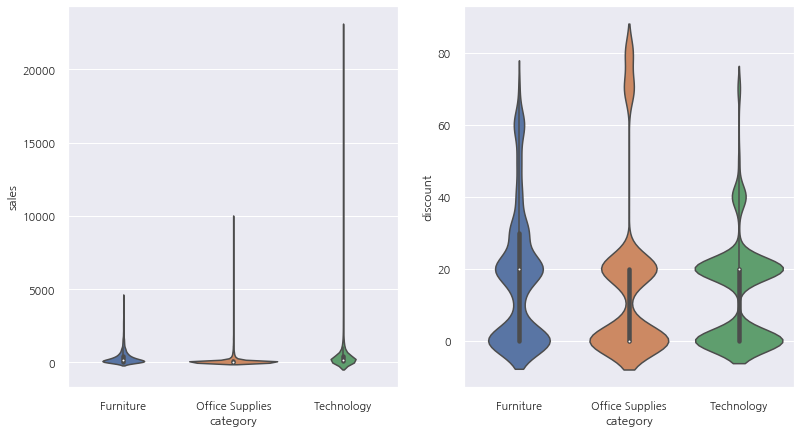

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.violinplot(x=sp1['category'], y=sp1['sales'], ax=ax[0])
sns.violinplot(x=sp1['category'], y=sp1['discount']*100, ax=ax[1])

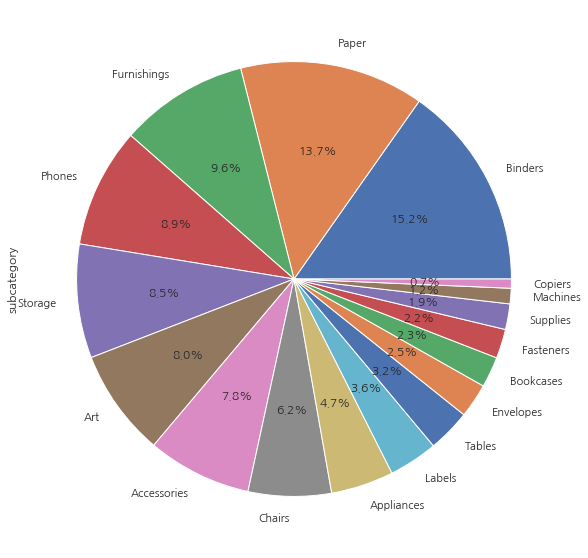

In [59]:
plt.figure(figsize=(12, 10))
sp1['subcategory'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

In [60]:
top_cities = sp['city'].value_counts().nlargest(10)
top_cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: city, dtype: int64

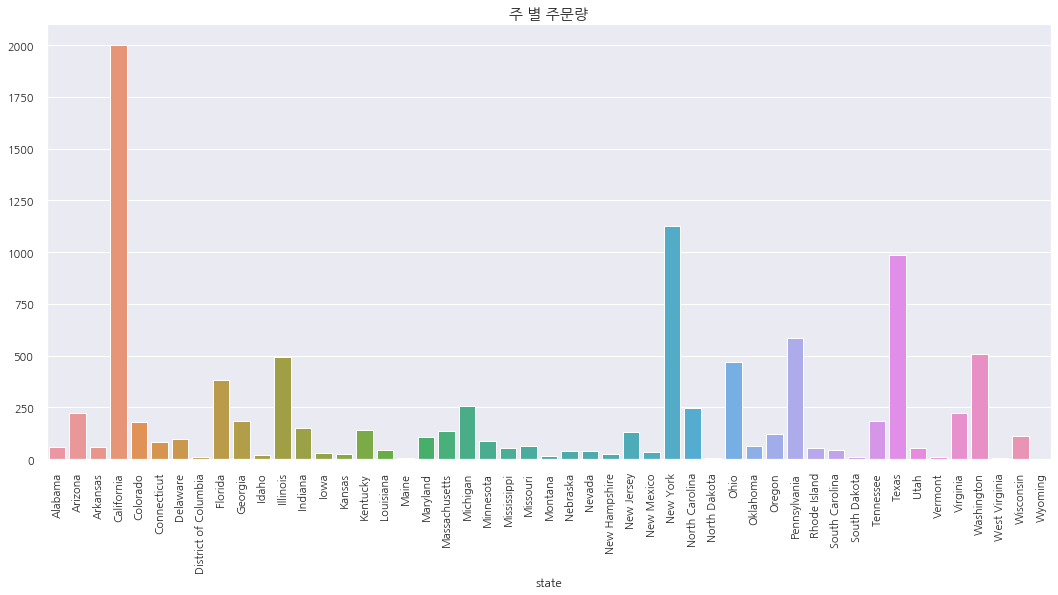

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

g = sns.countplot(sp1['state'].sort_values(), ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('주 별 주문량', size=15)
g.set_ylabel('')

plt.show()

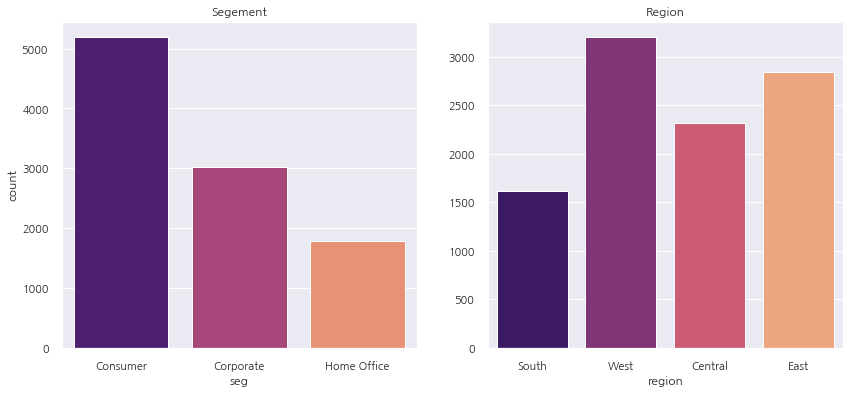

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=sp1['seg'], palette='magma', ax=ax[0])
ax[0].set_title('Segement')

sns.countplot(x=sp1['region'], palette='magma', ax=ax[1])
ax[1].set_title('Region')
ax[1].set_ylabel('')

plt.show()

C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lee45\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


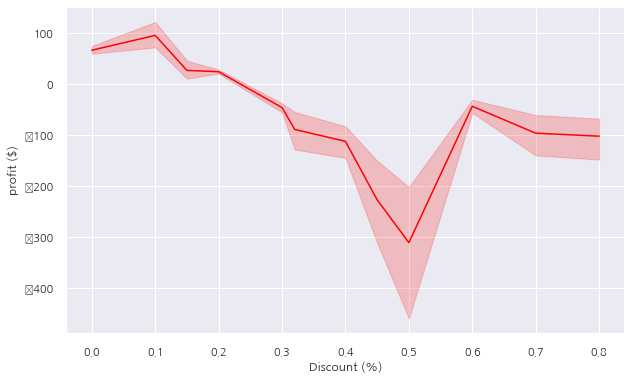

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot('discount', 'profit', data = sp1, color = 'red', ax=ax)

ax.set_xlabel('Discount (%)')
ax.set_ylabel('profit ($)')

plt.show()

In [64]:
sp_corr = sp1[['sales', 'quantity', 'discount', 'profit']].corr()
sp_corr

,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1, '판매가, 판매량, 할인가, 마진의 상관관계')

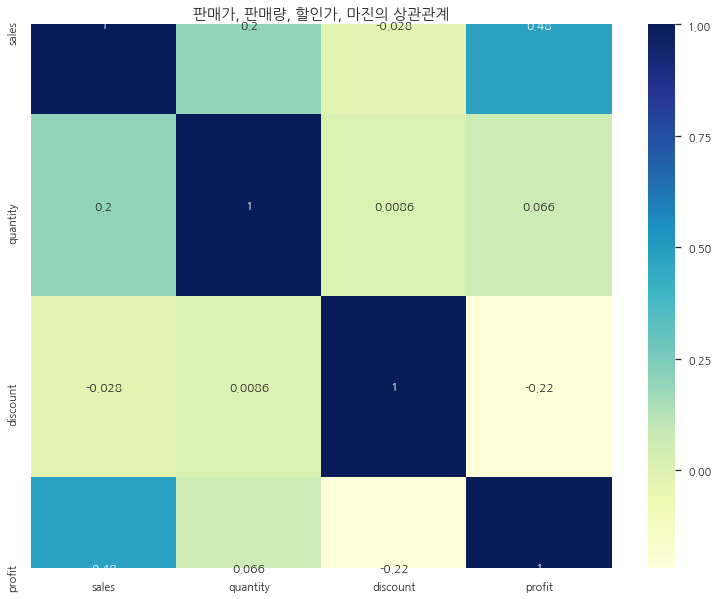

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(13, 10))
sns.heatmap(sp_corr, annot=True, cmap='YlGnBu', ax=ax)
plt.title('판매가, 판매량, 할인가, 마진의 상관관계', size=15)


In [66]:
top_prd1 = sp1.groupby(['product_name']).sum().sort_values('sales', ascending=False).head(10)

In [70]:
top_prd1.reset_index(inplace=True)

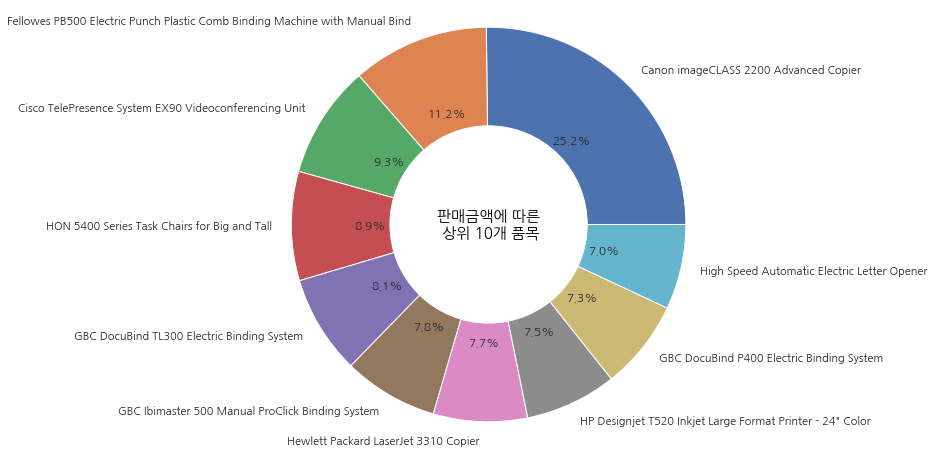

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(9,8))

ax.pie(top_prd1['sales'], labels=top_prd1['product_name'], autopct="%1.1f%%", startangle=0)
ax.set_ylabel('')

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
label = ax.annotate('판매금액에 따른\n 상위 10개 품목', color='black', xy=(0, -0.07), fontsize=15, ha='center')

plt.show()

In [69]:
top_prd1

,row_id,sales,quantity,discount,profit
product_name,,,,,
Canon imageCLASS 2200 Advanced Copier,28222,61599.824,20,0.6,2.519993e+04
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,61859,27453.384,31,2.4,7.753039e+03
Cisco TelePresence System EX90 Videoconferencing Unit,2698,22638.480,6,0.5,-1.811078e+03
HON 5400 Series Task Chairs for Big and Tall,44560,21870.576,39,1.6,3.979039e-13
GBC DocuBind TL300 Electric Binding System,64915,19823.479,37,3.3,2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System,57937,19024.500,48,4.7,7.609800e+02
Hewlett Packard LaserJet 3310 Copier,41444,18839.686,38,1.6,6.983884e+03
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",19245,18374.895,12,0.5,4.094977e+03
GBC DocuBind P400 Electric Binding System,27597,17965.068,27,2.7,-1.878166e+03


In [73]:
sales = sp1.groupby(['state']).sum().sort_values('sales', ascending=False)
sales.reset_index(level=0, inplace=True)

sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504


In [74]:
dc = sales[sales['state'] == 'District of Columbia'].index
sales = sales.drop(dc)
sales

,state,row_id,sales,quantity,discount,profit
0,California,10137449,457687.6315,7667,145.60,76381.3871
1,New York,5452096,310876.2710,4224,62.40,74038.5486
2,Texas,5085541,170188.0458,3724,364.64,-25729.3563
3,Washington,2584458,138641.2700,1883,32.40,33402.6517
4,Pennsylvania,2768523,116511.9140,2153,192.90,-15559.9603
5,Florida,1958255,89473.7080,1379,114.65,-3399.3017
6,Illinois,2571481,80166.1010,1845,191.90,-12607.8870
7,Ohio,2355994,78258.1360,1759,152.40,-16971.3766
8,Michigan,1200167,76269.6140,946,1.80,24463.1876
9,Virginia,1218137,70636.7200,893,0.00,18597.9504
